In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import json
import ast
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random

In [35]:
movies_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\movies_metadata.csv")
movies_df.head()

C:\Users\Jatin Dhall\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [36]:
ratings_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\ratings.csv")
ratings_df.head()

userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556

In [37]:
links_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\links.csv")
links_df.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [38]:
credits_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\credits.csv")
credits_df.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [39]:
keywords_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\keywords.csv")
keywords_df.head()

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

# Handling missing values

In [40]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [41]:
movies_df = movies_df.drop(columns = ["belongs_to_collection","homepage","tagline"],axis = 1)

In [42]:
movies_df = movies_df.dropna(axis = 0, how ='any')

In [43]:
movies_df.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [44]:
df_filtered = movies_df[(movies_df['budget'] != "0.0") & (movies_df['budget'] != "0") & (movies_df['revenue'] != "0.0") & (movies_df['revenue'] != "0")]

In [45]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [46]:
links_df.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [47]:
links_df = links_df.dropna(axis = 0,how = "any")

In [48]:
links_df.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [49]:
keywords_df.isnull().sum()

id          0
keywords    0
dtype: int64

In [50]:
credits_df.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [51]:
budgetList = list(pd.to_numeric(df_filtered["budget"]))
revenueList = list(pd.to_numeric(df_filtered["revenue"]))

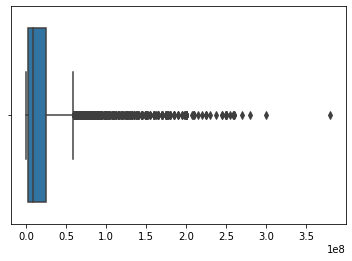

In [52]:
sns.boxplot(x = budgetList)

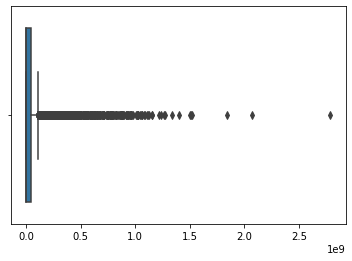

In [53]:
sns.boxplot(x = revenueList)

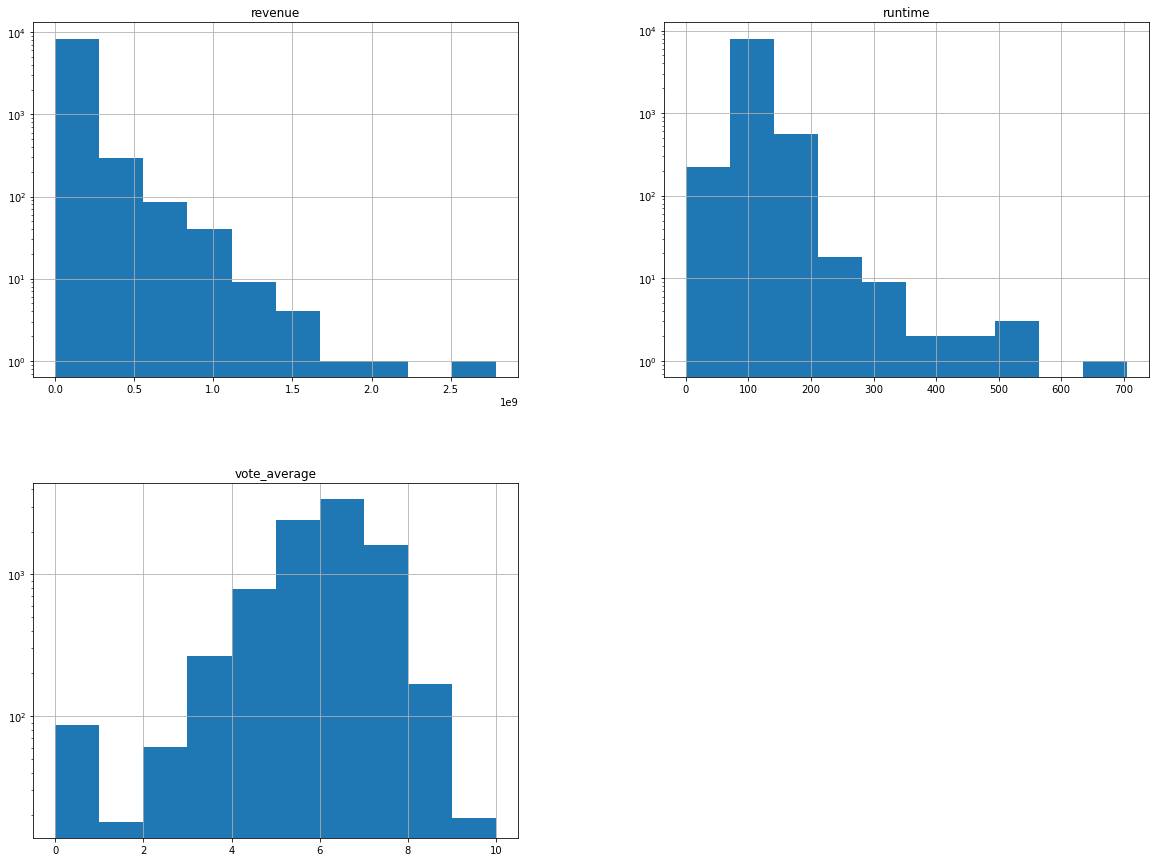

In [54]:
#Histograms
df_filtered[['revenue'] + ['runtime'] + ['vote_average']].hist(figsize=(20,15), log=True);

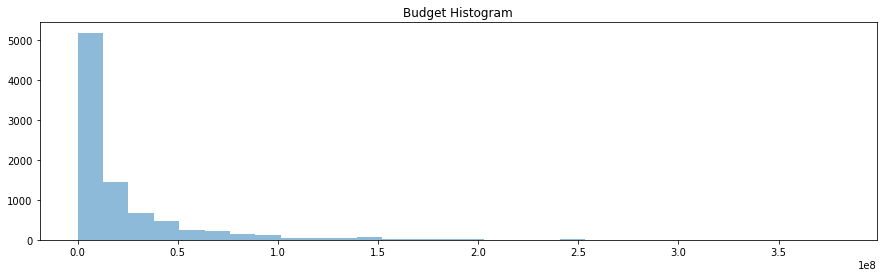

In [55]:
#Histogram for Budget
# Increase the width
plt.figure(figsize=(15,4))
plt.hist(budgetList, bins=30, alpha=0.5)
plt.title('Budget Histogram')
# plt.xlabel('Release Dates')
# plt.ylabel('No. of movies')

plt.show()

### Scatterplot for Runtime vs Budget

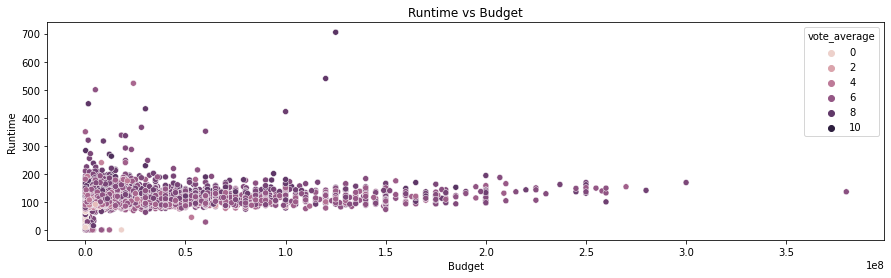

In [56]:
runtime_data = list(df_filtered["runtime"])
vote_avg = df_filtered['vote_average']
# Increase the width
plt.figure(figsize=(15,4))
sns.scatterplot(x = budgetList,y = runtime_data,hue = vote_avg)
plt.xlabel('Budget')
plt.ylabel('Runtime')
plt.title('Runtime vs Budget')
plt.show()

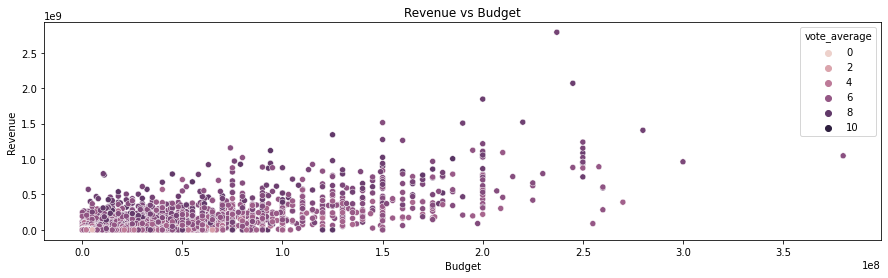

In [57]:
#Using hue as ratings or genres with respect to vote avg
# Increase the width
plt.figure(figsize=(15,4))
sns.scatterplot(x = budgetList,y = revenueList,hue = vote_avg)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs Budget')
plt.show()

### Finding correlation between Budget vs Revenue

In [58]:
corr, _ = pearsonr(budgetList, revenueList)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.740


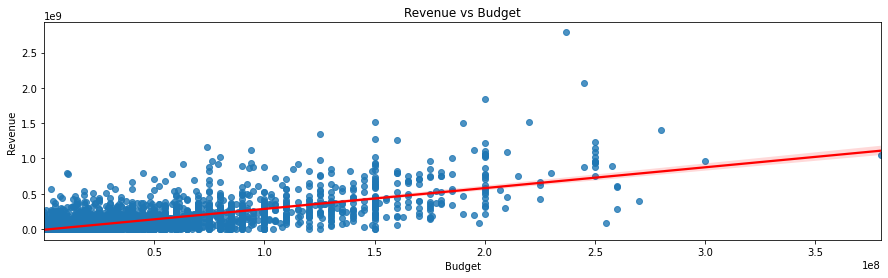

In [59]:
# Increase the width
plt.figure(figsize=(15,4))
#Display regression plot using seaborn
sns.regplot(x = budgetList,y = revenueList,line_kws={'color':'red'})
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs Budget')
plt.show()

### Applying Linear Regression

In [60]:
import math
model = LinearRegression()
x = np.array(budgetList)
x = x.reshape(-1,1)
y = np.array(revenueList)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 1)
model.fit(x_train,y_train)
pred = model.predict(x_test)

mse = metrics.mean_squared_error(y_test, pred)

rmse = math.sqrt(mse)

print(rmse)

# print(pred)
# print(y_test)
# print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

88315445.84177135


In [61]:
import math
actual = [0, 1, 2, 0, 3]
predicted = [0.1, 1.3, 2.1, 0.5, 3.1]

mse = metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

0.2720294101747089


In [62]:
df_filtered.head()

adult    budget                                             genres     id  \
0  False  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862   
1  False  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844   
3  False  16000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  31357   
5  False  60000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...    949   
6  False  58000000  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...  11860   

     imdb_id original_language     original_title  \
0  tt0114709                en          Toy Story   
1  tt0113497                en            Jumanji   
3  tt0114885                en  Waiting to Exhale   
5  tt0113277                en               Heat   
6  tt0114319                en            Sabrina   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...  21.946943   
1  When siblings Judy and Peter discover an encha...  17.015539   
3  Cheated on, mistreated and stepped on, the wom...   3.859495   
5  Obsessive master thief, Neil McCauley leads a ...  17.924927   
6  An ugly duckling having undergone a remarkable...   6.677277   

                        poster_path  ...  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg  ...   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg  ...   
3  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg  ...   
5  /zMyfPUelumio3tiDKPffaUpsQTD.jpg  ...   
6  /jQh15y5YB7bWz1NtffNZmRw0s9D.jpg  ...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
5  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
6  [{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...   1995-12-15   

       revenue  runtime                                   spoken_languages  \
0  373554033.0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
3   81452156.0    127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
5  187436818.0    170.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
6          0.0    127.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...   

     status              title  video vote_average  vote_count  
0  Released          Toy Story  False          7.7      5415.0  
1  Released            Jumanji  False          6.9      2413.0  
3  Released  Waiting to Exhale  False          6.1        34.0  
5  Released               Heat  False          7.7      1886.0  
6  Released            Sabrina  False          6.2       141.0  

[5 rows x 21 columns]

In [63]:
#Code to get a list of all the genres
genreListEncoded = df_filtered["genres"]
genreListEncoded = list(genreListEncoded)
genreList = []
for i in genreListEncoded:
    i = ast.literal_eval(i)
    for j in i:
        genreList.append(j['name'])

genreset = set(genreList)
# convert the set to the list
genres = (list(genreset))
print(genres)

['Family', 'Romance', 'TV Movie', 'Fantasy', 'Thriller', 'Documentary', 'Mystery', 'War', 'Comedy', 'Western', 'Drama', 'Action', 'Adventure', 'Animation', 'Crime', 'History', 'Horror', 'Foreign', 'Science Fiction', 'Music']


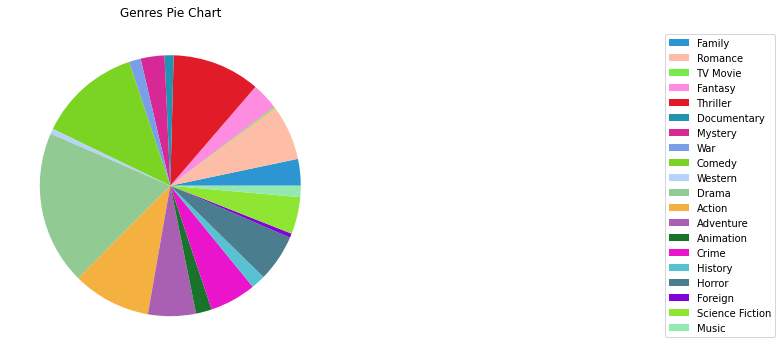

In [65]:
genres_count = []
number_of_colors = len(genres)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

for i in genres:
    count = genreList.count(i)
    genres_count.append(count)

# Increase the width
plt.figure(figsize=(20,6))
plt.pie(genres_count,colors = color)
plt.title("Genres Pie Chart")
# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
plt.gca().legend(labels = genres,loc='center left', bbox_to_anchor=(2, 0.5))
plt.show()

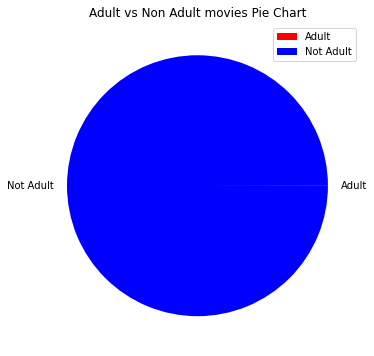

In [66]:
adult_data = list(movies_df['adult'])
count = adult_data.count("True")
count1 = adult_data.count("False")

adult_count = [count,count1]


color = ['r','b']

labels = ["Adult","Not Adult"]
# Increase the width
plt.figure(figsize=(20,6))
plt.title("Adult vs Non Adult movies Pie Chart")
plt.pie(adult_count,colors = color, labels = labels)
plt.legend(labels,loc=1)
plt.show()

In [67]:
# Code to get a list of all the release dates
release_dates = df_filtered["release_date"]
dates = []
for i in release_dates:
    dates.append(int(i[0:4]))
    
print(max(dates))

2018


### Bar chart to show the frequency of the languages

In [68]:
languages = list(df_filtered["original_language"])
uniq_languages = list(set(languages))
lang_count = []
print(uniq_languages)
for i in uniq_languages:
    count = languages.count(i)
    lang_count.append(count)

['af', 'te', 'no', 'ur', 'ja', 'zh', 'ps', 'uk', 'mr', 'de', 'fa', 'ko', 'ku', 'nl', 'es', 'is', 'la', 'sv', 'ca', 'ta', 'lo', 'ru', 'sr', 'fi', 'hu', 'bo', 'ar', 'ml', 'pt', 'kn', 'et', 'xx', 'bm', 'pl', 'tr', 'fr', 'da', 'cn', 'hi', 'bg', 'sq', 'id', 'it', 'vi', 'he', 'sl', 'cs', 'el', 'nb', 'en', 'lv', 'bs', 'ro', 'th']


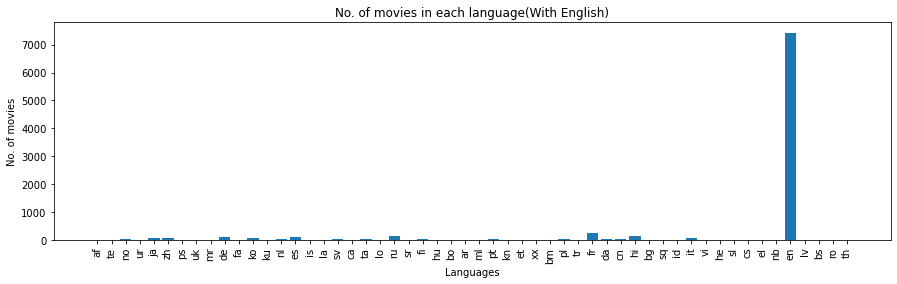

In [69]:
#BAR PLOT WITH EN
# Increase the width
plt.figure(figsize=(15,4))
# Horizontal Bar Plot
plt.bar(uniq_languages, lang_count)

plt.xticks(rotation=90)

plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title("No. of movies in each language(With English)")
# Show Plot
plt.show()

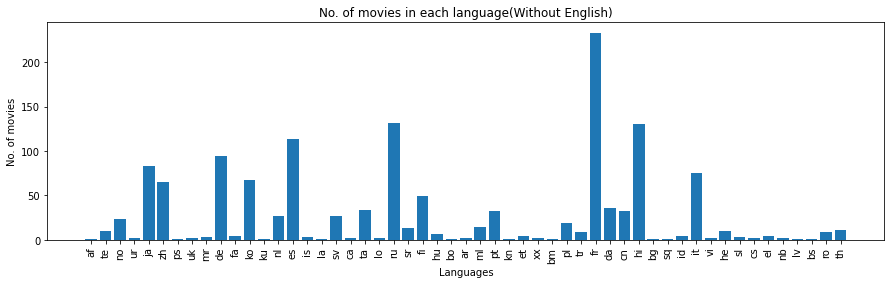

In [70]:
#BAR PLOT WITHOUT EN
uniq_lang_without = []
lang_count_without = []

for i in uniq_languages:
    if i != 'en':
        count = languages.count(i)
        uniq_lang_without.append(i)
        lang_count_without.append(count)

# Increase the width
plt.figure(figsize=(15,4))
# Horizontal Bar Plot
plt.bar(uniq_lang_without, lang_count_without)

plt.xticks(rotation=90)

plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title("No. of movies in each language(Without English)")
# Show Plot
plt.show()

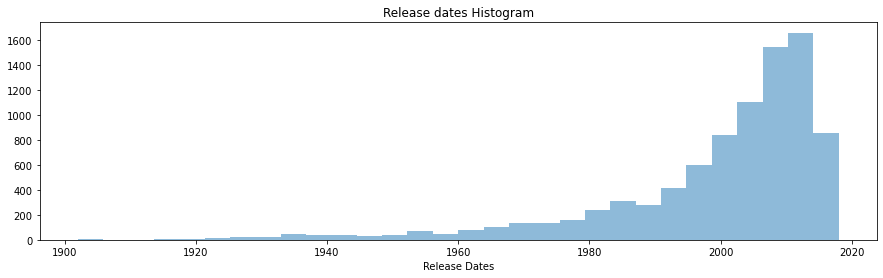

In [71]:
#Histogram for release years
# Increase the width
plt.figure(figsize=(15,4))
plt.hist(dates, bins=30, alpha=0.5)
plt.title('Release dates Histogram')
plt.xlabel('Release Dates')

plt.show()

<class 'list'>
['Poland', 'Dominican Republic', 'Puerto Rico', 'Thailand', 'Czech Republic', 'Cambodia', 'Botswana', 'Namibia', 'Russia', 'Spain', 'Peru', 'Uganda', 'Libyan Arab Jamahiriya', 'Ecuador', 'Uruguay', 'Bolivia', 'Slovakia', 'Bulgaria', 'Ireland', 'China', 'Belarus', 'Iran', 'Taiwan', 'Angola', 'United Arab Emirates', 'Tunisia', 'Panama', 'Philippines', 'Pakistan', 'Burkina Faso', 'Slovenia', 'Monaco', 'Israel', 'Georgia', 'South Africa', 'Aruba', 'Ukraine', 'Canada', 'South Korea', 'France', 'Guatemala', 'Malta', 'Kazakhstan', 'Serbia', 'Switzerland', 'Denmark', 'Brazil', 'Morocco', 'Hong Kong', 'Cyprus', 'Australia', 'India', 'Norway', 'Mali', 'Sweden', 'Honduras', 'Italy', 'Rwanda', 'Hungary', 'Paraguay', 'United States of America', 'United Kingdom', 'Iceland', 'Malaysia', 'Qatar', 'Kenya', 'Luxembourg', 'Ghana', 'Argentina', 'Singapore', 'Germany', 'Nigeria', 'Costa Rica', 'Austria', 'Afghanistan', 'Latvia', 'Croatia', 'Gibraltar', 'Colombia', 'Finland', 'Jamaica', "Lao 

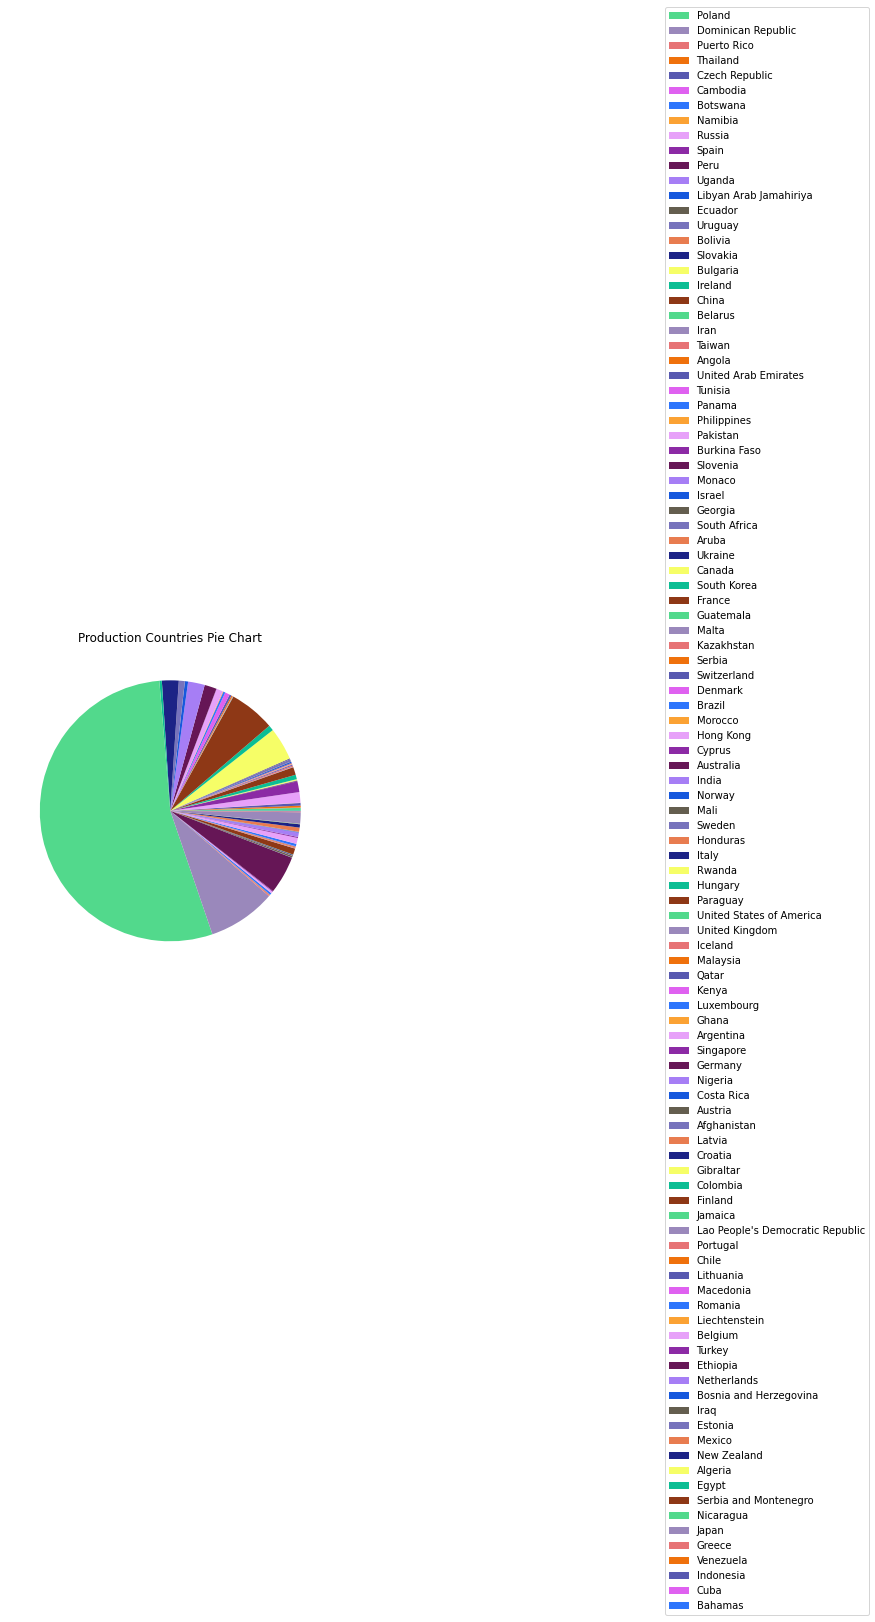

In [72]:
# Pie chart of production countries(Most movies from which countries)
pr_countries = list(df_filtered["production_countries"])
pr_countriesL = []
print(type(pr_countries))
# print(pr_countries)
for i in pr_countries:
    i = ast.literal_eval(i)
    for j in i:
        pr_countriesL.append(j['name'])
        
# print(pr_countriesL)
pr_countrySet = set(pr_countriesL)
pr_countryList = list(pr_countrySet)
print(pr_countryList)

no_of_countries = len(pr_countryList)
print(no_of_countries)

avg = []
for i in pr_countryList:
    count = pr_countriesL.count(i)
    avg.append(count)
    
print(avg)

number_of_colors = len(genres)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# Increase the width
plt.figure(figsize=(20,6))
plt.pie(avg,colors = color)
plt.title("Production Countries Pie Chart")
# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
plt.gca().legend(labels = pr_countryList,loc='center left', bbox_to_anchor=(2, 0.5))
plt.show()